In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Total number of processed images
processed_csv_files = ['L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Results_Batch_1.csv' , 
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Results_Batch_2.csv',
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Results_Batch_3.csv']

total_processed_images = 0

for file in processed_csv_files:
    df = pd.read_csv(file) 
    total_processed_images += len(df)  

print("Total number of processed ISIS images:", total_processed_images)

Total number of processed ISIS images: 838437


In [30]:
#Total number of unprocessed images
loss_csv_files = ['L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Loss_Batch_1.csv' , 
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Loss_Batch_2.csv ',
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Loss_Batch_3.csv']

unique_image_paths = set()

for file in loss_csv_files :
    df = pd.read_csv(file)  
    image_paths = df.apply(lambda row: f"{row['Directory']}/{row['Subdirectory']}/{row['Filename']}", axis=1)
    unique_image_paths.update(image_paths)

total_loss_images = len(unique_image_paths)

print("Total unique loss images across all files (excluding duplicates):", total_loss_images)

Total unique loss images across all files (excluding duplicates): 533364


In [31]:
Total_postprocess_count = total_loss_images + total_processed_images
print("Total number of images:",Total_postprocess_count)

Total number of images: 1371801


In [32]:
Yield  = total_processed_images * 100/1389928 #total number of ISIS images including those flagged in the error analysis report
print ("The sucess process yield is: ", Yield)

The sucess process yield is:  60.3223332431608


### Unprocessed images 

In [41]:
#Testing if there are any matches between the loss .csv and the ones previously flagged for rescanning
cropped_too_soon_flagged = ['L:/DATA/ISIS/cropped_too_soon_detection_batch1/cropped_too_soon_results.csv',
                            'L:/DATA/ISIS/cropped_too_soon_detection_batch2/cropped_too_soon_results.csv',
                            'L:/DATA/ISIS/cropped_too_soon_detection_batch2_addition/cropped_too_soon_results.csv',
                            'L:/DATA/ISIS/cropped_too_soon_detection_batch3/cropped_too_soon_results.csv']
cropped_paths_set = set()
for file in cropped_too_soon_flagged:
    df_cropped = pd.read_csv(file)
    cropped_image_paths = df_cropped.apply(lambda row: f"{row['Directory']}/{row['Subdirectory']}/{row['Filename']}", axis=1)
    cropped_paths_set.update(cropped_image_paths)

total_matches = 0
unmatched_image_paths = []

for file in loss_csv_files:
    df_loss = pd.read_csv(file)
    loss_image_paths = df_loss.apply(lambda row: f"{row['Directory']}/{row['Subdirectory']}/{row['Filename']}", axis=1)
    matched_paths = set(loss_image_paths) & cropped_paths_set
    total_matches += len(matched_paths)
    unmatched_image_paths.extend(list(set(loss_image_paths) - matched_paths))

print("Total values from loss_csv files that match with cropped_too_soon_flagged paths:", total_matches)


Total values from loss_csv files that match with cropped_too_soon_flagged paths: 531305


In [46]:
true_loss = total_loss_images - total_matches
print ("True loss post processing: " , true_loss)

True loss post processing:  2059


In [44]:
unmatched_df = pd.DataFrame({"Image_Path": unmatched_image_paths})
unmatched_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/unmatched_loss_images.csv', index=False)

print("Unmatched values have been saved to unmatched_loss_images.csv")


Unmatched values have been saved to unmatched_loss_images.csv


 ### Some examples of true loss
 All of the 2059 images are within the R014207775 directory under Batch II

L:\DATA\ISIS\ISIS_102000056114\R014207775\B1-35-23 ISIS B D-618\image14312.png

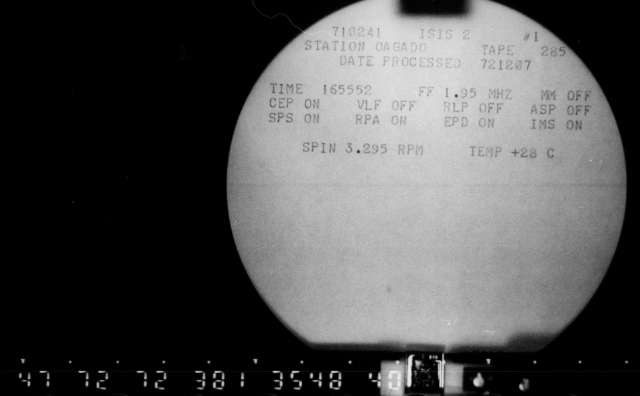

L:\DATA\ISIS\ISIS_102000056114\R014207775\B1-35-23 ISIS B D-609\image10237.png

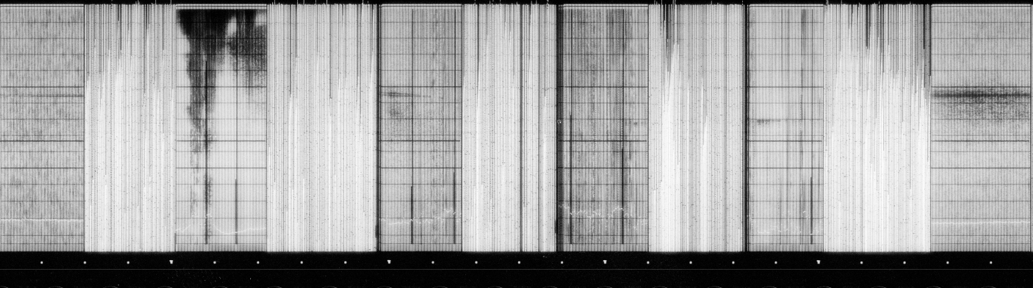

In [57]:
Corrected_yield = 1389928 - true_loss
Corrected_yield_percent = Corrected_yield * 100/1389928 
print ("True yield post processing with the results of the expected losses included:", Corrected_yield_percent)

True yield post processing with the results of the expected losses included: 99.85186283030488


### Processed images 

In [59]:
merged_df = pd.concat([pd.read_csv(file) for file in processed_csv_files])

In [60]:
print(merged_df[['Year', 'Day', 'Hour', 'Minute', 'Second']].head(10))

   Year  Day  Hour  Minute  Second
0    71   61    16      50      30
1    71   61    16      50      59
2    71   61    16      51      28
3    71   61    16      51      57
4    71   61    16      52      26
5    71   61    16      52      55
6    71   61    16      53      23
7    11   61    16      53      52
8    71   61    16      54      21
9    71   61    16      54      50


In [107]:
#Testing the year coloumn to see if the range make sense. ISIS - I was launched in 1969 so no value should lower than 69
year_range = (merged_df['Year'].min(), merged_df['Year'].max())

count_lower_than_1969 = (merged_df['Year'] < 69).sum()

print("Range of the 'Year' column:", year_range)
print("Number of values in the 'Year' column lower than 1969 (incorrectly identified):", count_lower_than_1969)

Range of the 'Year' column: (0.0, 99.0)
Number of values in the 'Year' column lower than 1969 (incorrectly identified): 83974


In [128]:
filtered_df = merged_df[merged_df['Year'] < 69.0]

# Print the top 15 rows
print("Top 15 rows with 'Year' values less than 1969:")
print(filtered_df.head(15))

Top 15 rows with 'Year' values less than 1969:
    Unnamed: 0  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
7            7               3                     4              70   
20          20               3                     6              10   
23          23               3                     6              70   
29          29               3                     6              70   
31          31               3                     1              70   
33          33               3                     1              70   
34          34               3                     1              10   
35          35               3                     1              70   
36          36               3                     1              70   
38          38               3                     1              71   
39          39               3                     1              70   
40          40               3                     1              70   
45          45   

In [109]:
max_year = year_counts.idxmax()
max_count = year_counts.max()
print(f"The year with the most data points is {max_year} with {max_count} data points.")

The year with the most data points is 72.0 with 344753 data points.


In [110]:
min_year = year_counts.idxmin()
min_count = year_counts.min()
print(f"The year with the least data points is {min_year} with {min_count} data points.")

The year with the least data points is 84.0 with 2 data points.


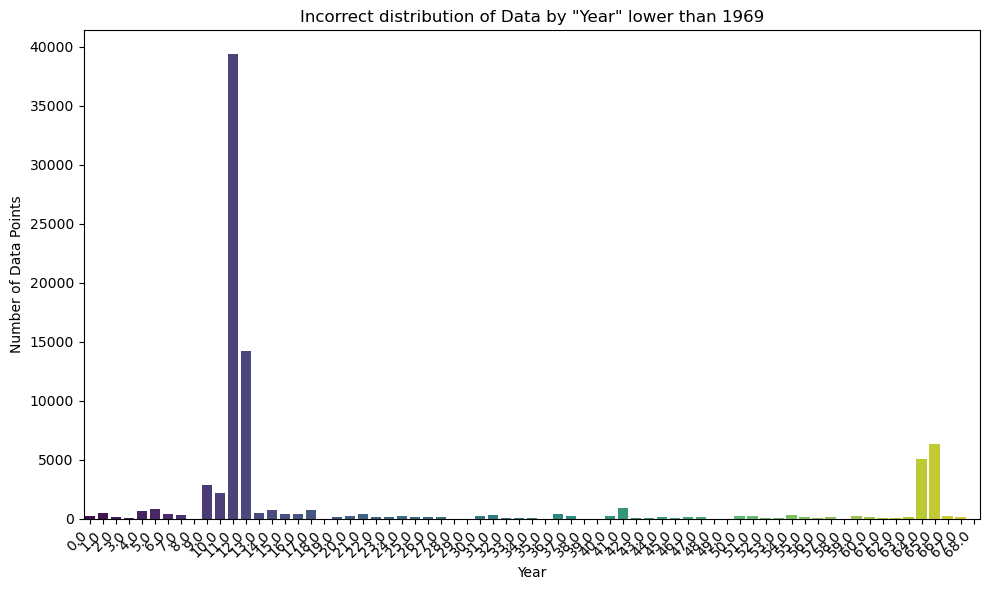

In [112]:
filtered_year_counts = year_counts[year_counts.index <69]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_year_counts.index, y=filtered_year_counts.values, palette="viridis")
plt.title('Incorrect distribution of Data by "Year" lower than 1969')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

In [122]:
# same concept now for day
day_counts = merged_df['Day'].value_counts()
day_range = (merged_df['Day'].min(), merged_df['Day'].max())

count_more_than_365 = (merged_df['Day'] > 365).sum()

print("Range of the 'Day' column:", day_range)
print("Number of values in the 'Day' column more than 365 (incorrectly identified):", count_more_than_365)

Range of the 'Day' column: (0, 999)
Number of values in the 'Day' column more than 365 (incorrectly identified): 14472


In [123]:
filtered_df = merged_df[merged_df['Day'] > 365]

# Print the top 15 rows
print("Top 15 rows with 'Year' values more than 365:")
print(filtered_df.head(15))

Top 15 rows with 'Year' values more than 365:
       Unnamed: 0  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
38             38               3                     1              71   
2481           20               3                     1              32   
2718          257               3                     7              72   
3082          239               3                     2              69   
3279          178               3                     2              69   
3925            0               3                     7              69   
3926            1               3                     7              69   
7515           16               3                     7               8   
7942          167               3                     0               6   
10826          54               3                     7              72   
11214          84               2                     7              72   
12228         482               3                     

In [125]:
max_day = day_counts.idxmax()
max_day_count = day_counts.max()
print(f"The year with the most data points is {max_day} with {max_day_count} data points.")

The year with the most data points is 0 with 10353 data points.


In [133]:
min_day = day_counts.idxmin()
min_day_count = day_counts.min()
print(f"The year with the least data points is {min_day} with {min_day_count} data points.")

The year with the least data points is 589 with 1 data points.


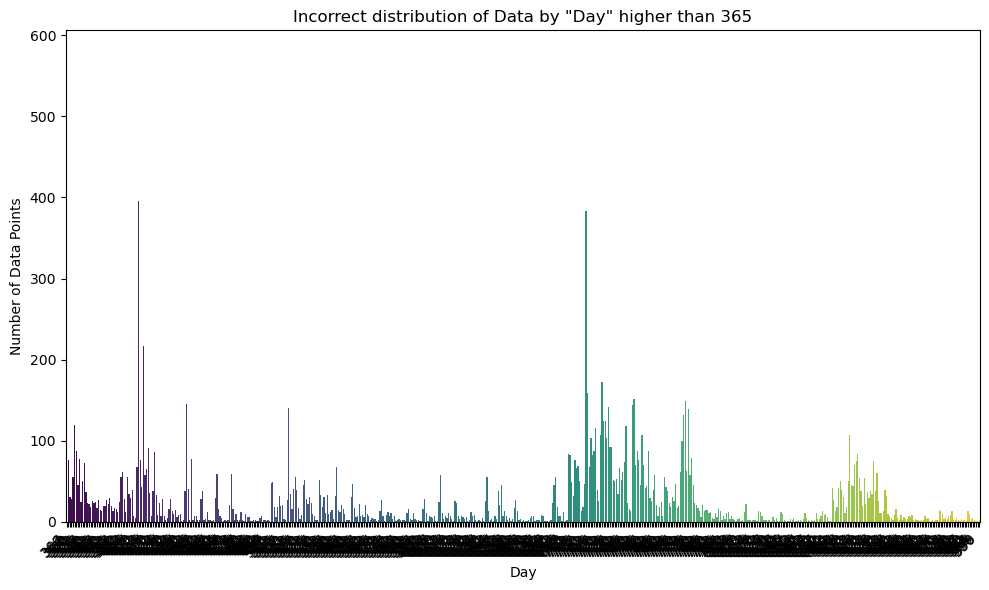

In [124]:
filtered_day_counts = day_counts[day_counts.index > 365]
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_day_counts.index, y=filtered_day_counts.values, palette="viridis")
plt.title('Incorrect distribution of Data by "Day" higher than 365')
plt.xlabel('Day')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [131]:
#Hour
Hour_counts = merged_df['Hour'].value_counts()

Hour_range = (merged_df['Hour'].min(), merged_df['Hour'].max())

count_more_than_60 = (merged_df['Hour'] > 60).sum()

print("Range of the 'Hour' column:", year_range)
print("Number of values in the 'Hour' column more than 60 (incorrectly identified):", count_more_than_60)

Range of the 'Hour' column: (0.0, 99.0)
Number of values in the 'Hour' column more than 60 (incorrectly identified): 7011


In [132]:
filtered_df = merged_df[merged_df['Hour'] > 60]

# Print the top 15 rows
print("Top 15 rows with 'Hour' values more than 60:")
print(filtered_df.head(15))

Top 15 rows with 'Hour' values more than 60:
       Unnamed: 0  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
38             38               3                     1              71   
2478           17               3                     7              72   
2685          224               3                     1              17   
3311          210               3                     4              69   
4276           35               3                     1              10   
5009           18               3                     1              10   
7966          191               3                     1              10   
10481         289               3                     7               8   
11455         325               3                     7              72   
11474          12               3                     7              72   
12301         555               3                     7              43   
13268          77               3                     1

In [134]:
max_Hour = Hour_counts.idxmax()
max_Hour_count = Hour_counts.max()
print(f"The year with the most data points is {max_Hour} with {max_Hour_count} data points.")

The year with the most data points is 0 with 42898 data points.


In [135]:
min_Hour = Hour_counts.idxmin()
min_Hour_count = Hour_counts.min()
print(f"The year with the least data points is {min_Hour} with {min_Hour_count } data points.")

The year with the least data points is 98 with 11 data points.
